In [1]:

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from pyextremes import get_extremes, get_return_periods
%matplotlib inline  
from pyextremes.eva import EVA


In [2]:
data = (
    pd
    .read_csv("modified_Hs.csv", index_col=0, parse_dates=True)
    .sort_index(ascending=True)
    .astype(float)
    .dropna()
)
data.head()
wave_heights=data["Hs"]

In [3]:
# Create an EVA object
model = EVA(wave_heights)

In [4]:
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                            Hs      Size:                             376,944
Start:                       January 1980      End:                         January 2023
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Extreme values have not been extracted
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fit to the extremes

In [5]:
model.get_extremes(
    method="BM",
    extremes_type="high",
    block_size="365.2425D",
    errors="raise",
    #threshold="2",
)
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                            Hs      Size:                             376,944
Start:                       January 1980      End:                         January 2023
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 44      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fi

(<Figure size 768x480 with 1 Axes>, <Axes: xlabel='datetime', ylabel='Hs'>)

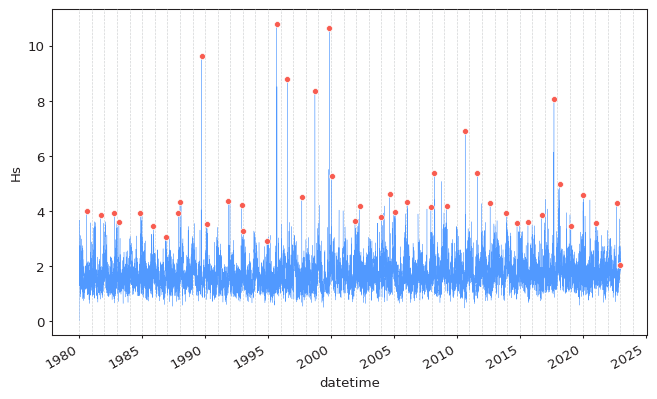

In [6]:
model.plot_extremes()

In [7]:
model.fit_model()
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                            Hs      Size:                             376,944
Start:                       January 1980      End:                         January 2023
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 44      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

(<Figure size 768x768 with 4 Axes>,
 (<Axes: title={'center': 'Return value plot'}, xlabel='Return period', ylabel='Hs'>,
  <Axes: title={'center': 'Probability density plot'}, xlabel='Hs', ylabel='Probability density'>,
  <Axes: title={'center': 'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <Axes: title={'center': 'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

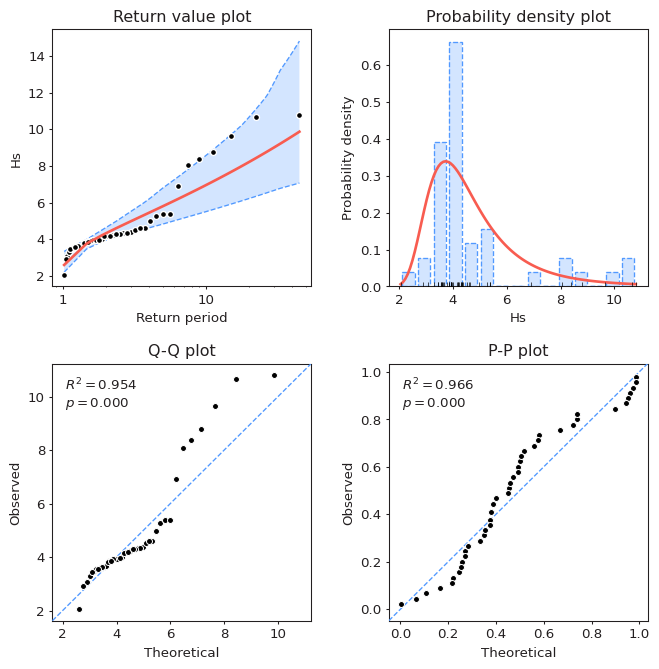

In [8]:
model.plot_diagnostic(alpha=0.95)
 

In [9]:
import matplotlib
matplotlib.__version__

'3.9.0'

(<Figure size 768x480 with 1 Axes>,
 <Axes: xlabel='Return period', ylabel='Hs'>)

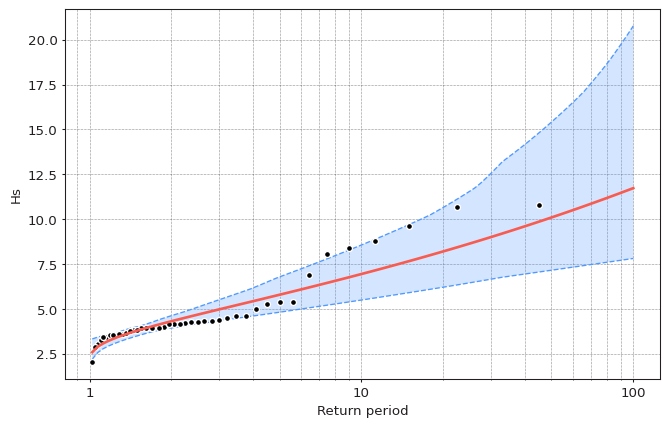

In [10]:
model.plot_return_values(
    return_period=np.logspace(0.01, 2, 100),
    return_period_size="365.2425D",
    alpha=0.95,
)

In [11]:
summary = model.get_summary(
    return_period=[1.05, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)
summary

,return value,lower ci,upper ci
return period,,,
1.05,2.790756,2.446029,3.403706
2.00,4.321158,3.944233,4.651904
5.00,5.796814,4.913467,6.648345
10.00,6.950142,5.644840,8.413999
25.00,8.644697,6.604239,12.158767
50.00,10.099063,7.371570,16.948227
100.00,11.733484,8.137151,24.787366
250.00,14.218099,9.128555,40.782413
500.00,16.381345,9.893611,61.096078


In [13]:
import math
return_periods_of_interest = np.array([1.0, 2, 5, 10, 50, 100])

for i, R in enumerate(return_periods_of_interest): 
    print(R)
    wht=3.41 + 2.04*math.log(R)
    print(wht)

1.0
3.41
2.0
4.824020248342288
5.0
6.693253341365565
10.0
8.107273589707855
50.0
11.390526931073417
100.0
12.804547179415708
